# Customer Analytic Project

The project focuses on cohort analysis, revenue trends, RFM (Recency, Frequency, Monetary) analysis, and the implementation of machine learning models to predict customer behavior.

## Results of the Analysis

### Cohort Analysis
- Identified a high-retention December 2010 cohort.
- Observed return behavior in November, followed by a significant drop in activity.

### Revenue Analysis
- December showcased exceptional revenue and retention.
- May cohort recorded over 100% revenue growth in December.
- Highest revenue in December 2010, with a subsequent decline post-May.

### Top 5 Recommendations:
1. **Learn from December 2010:**
   - Replicate successful strategies from December 2010 to boost retention and revenue.
2. **Analyze August Cohort:**
   - Investigate why the August cohort retains well; apply insights for overall retention.
3. **Uncover May Cohort's Secrets:**
   - Explore factors behind exceptional revenue in the May cohort for replication.
4. **Targeted December 2010 Tactics:**
   - Implement strategies similar to those that worked in December 2010.
5. **Crack the August Code:**
   - Investigate and implement factors contributing to notable retention in August.



### RFM Analysis
- Favorable average frequency of 91 purchases with a 4-day recurrence.
- Segments customers based on their monetary and recency ranges.
- Average spend is $674.


### Machine Learning Model
- Regression Model predicting customer spending in the next 90 days (R-squared of 81%).
- Classification Model predicting the probability of a purchase in the next 90 days (AUC of 71%).

### Model Applications:
- Identify missed opportunities for recent customer spending.
- Recognize customers with the highest probability of buying in the next 90 days.
- Identify customers expected to make a purchase but did not.
- Recognize customers who recently purchased but are unlikely to buy again.

### Results:
1. For making customer spend more money focus on making customer recency and monetary
2. For keeping the customer focusing on customer frequency 


In [1]:
# imoprt libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
# Check for null vlaues 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

we have 135,080 customer without id, and we are only interested with the customer we have so i will drop the any entity that have a value null value in the customer id column

In [6]:
df.dropna(subset= 'CustomerID', inplace= True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df.shape

(406829, 8)

The InvoiceNo number uniquely assigned to each transaction. If it starts with letter 'C', it indicates a cancellation

In [8]:
df[df['InvoiceNo'].str.contains('C','c')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [9]:
df[df['InvoiceNo'].str.contains('C','c')].shape

(8905, 8)

So there is 8,905 transactions canceled , i will drop them out

In [10]:
# drop canceled orders
df = df.drop(df[df['InvoiceNo'].str.contains('C')].index)

Can also see some columns have wrong data types so i will correct them

In [11]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
df[['InvoiceNo','CustomerID']] = df[['InvoiceNo','CustomerID']].astype('int64')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


and lastly i will create a value column for the amount of money the customer spend for each transaction

In [15]:
# creating Value column
df['Value'] = df['Quantity'] * df['UnitPrice']

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


That was all the data wrangling for this data now will start the analysis, before i got into depth analysis i want to see how the country can affect the business 


In [17]:
df['Country'].nunique()

37

We have 37 country in this data set i will see the top 5 country in terms of revenue and number of customers

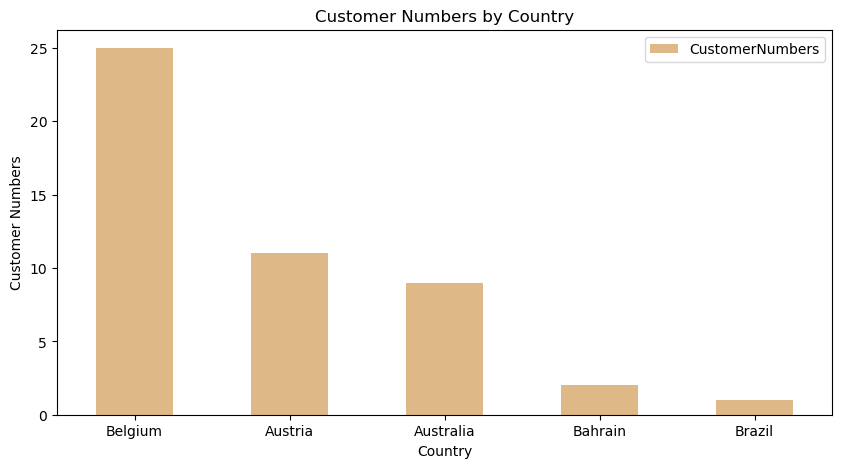

In [18]:
df.groupby('Country').agg({'CustomerID': pd.Series.nunique})[0:5].sort_values('CustomerID', ascending= False)\
.set_axis(['CustomerNumbers'], axis = 1).plot(kind = 'bar', color = 'burlywood', figsize = (10,5))
plt.xlabel('Country')
plt.ylabel('Customer Numbers')
plt.title('Customer Numbers by Country')
plt.xticks(rotation = 0)
plt.show()

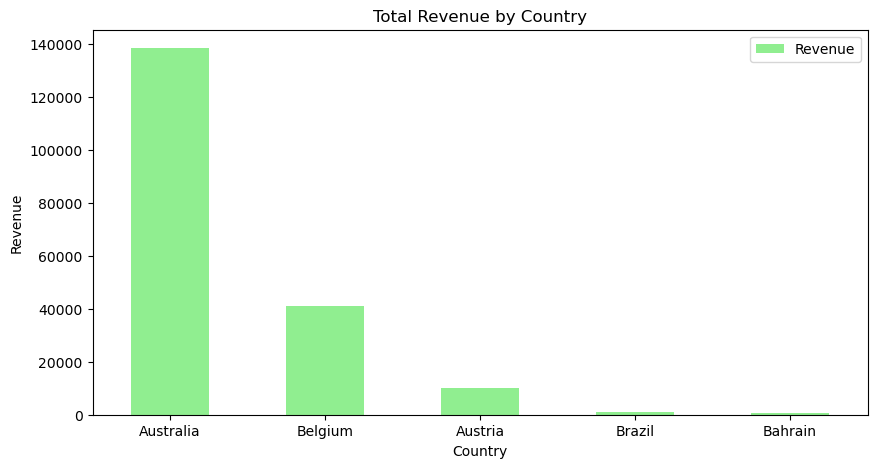

In [19]:
df.groupby('Country').agg({'Value': sum})[0:5].sort_values('Value', ascending= False)\
.set_axis(["Revenue"], axis = 1).plot(kind = 'bar', color = 'lightgreen', figsize = (10,5))
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Total Revenue by Country')
plt.xticks(rotation = 0)
plt.show()

We can notice Belgium have highest number of customer but Australia making the greatest revenue
so the firm can 
   - Encouraging people to buy in Belgium
   - Making marketing campaign to gain more customers in Australia
   - See what marketing strategy for these country and apply it on other country

# Cohort Analysis

In [20]:
# creating monthly based invoice date for the cohort analysis
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x : x.strftime('%Y-%m'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [21]:
cohor_df = df[['CustomerID', 'InvoiceMonth']]\
    .sort_values('InvoiceMonth')\
    .groupby(['CustomerID']).first()

In [22]:
cohor_df.columns = ['CohortDate']
cohor_df.head()

,CohortDate
CustomerID,
12346,2011-01
12347,2010-12
12348,2010-12
12349,2011-11
12350,2011-02


In [23]:
print("Min Date: ",cohor_df['CohortDate'].min()\
      ,"\nMax Date: ",cohor_df['CohortDate'].max())

Min Date:  2010-12 
Max Date:  2011-12


Creating Cohort month to specify the first time we acquire the customer

In [24]:
# Cohort month
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12


now creating cohort index, for not making the dataframe wider i will create a function to get the month and year (since the date ranges from 2010 to 2011) to get the index

In [25]:
# Creating function to get the month and the year
def dates_values(df,col):
    month = pd.to_datetime(df[col]).dt.month
    year = pd.to_datetime(df[col]).dt.year
    return month, year

In [26]:
InvoiceMonth, InvoiceYear = dates_values(df,'InvoiceMonth')
CohortMonth, CohortYear = dates_values(df, 'CohortMonth')

In [27]:
# create cohor index
mnth_diff = InvoiceMonth - CohortMonth
yr_diff = InvoiceYear - CohortYear
df['CohortIndex'] = yr_diff*12+mnth_diff+1  # the 1 included is optional just incase we get value of zero

In [28]:
cohort_table = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()  

In [29]:
cohort_pivot = cohort_table.pivot(index= 'CohortMonth', columns= 'CohortIndex', values= 'CustomerID')
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


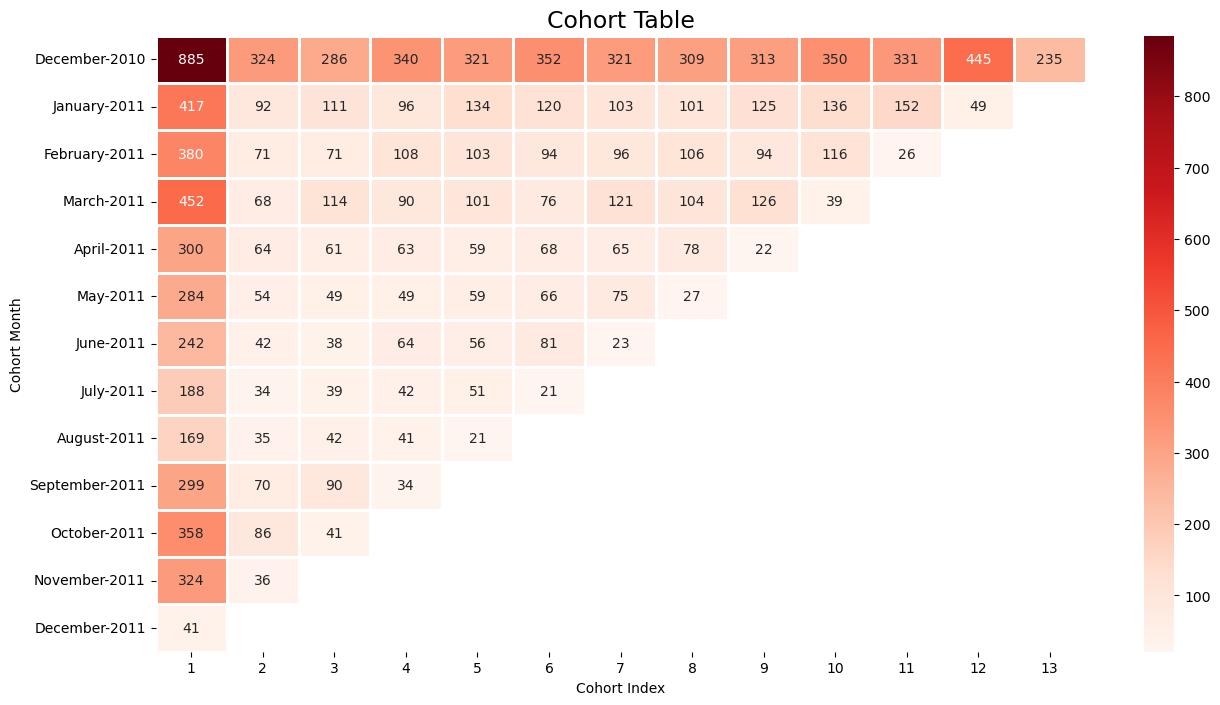

In [30]:
# plotting the cohort data

plt.figure(figsize= (15,8))
cohort_pivot.index = pd.to_datetime(cohort_pivot.index).strftime('%B-%Y')
sns.heatmap(cohort_pivot, cmap= 'Reds', cbar = True, annot = True, fmt= '.0f', linewidths=1, linecolor='white')
plt.title('Cohort Table', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

In [31]:
# making Customer retention table
cohort_perc = cohort_pivot.div(cohort_pivot.iloc[:,0], axis = 0)

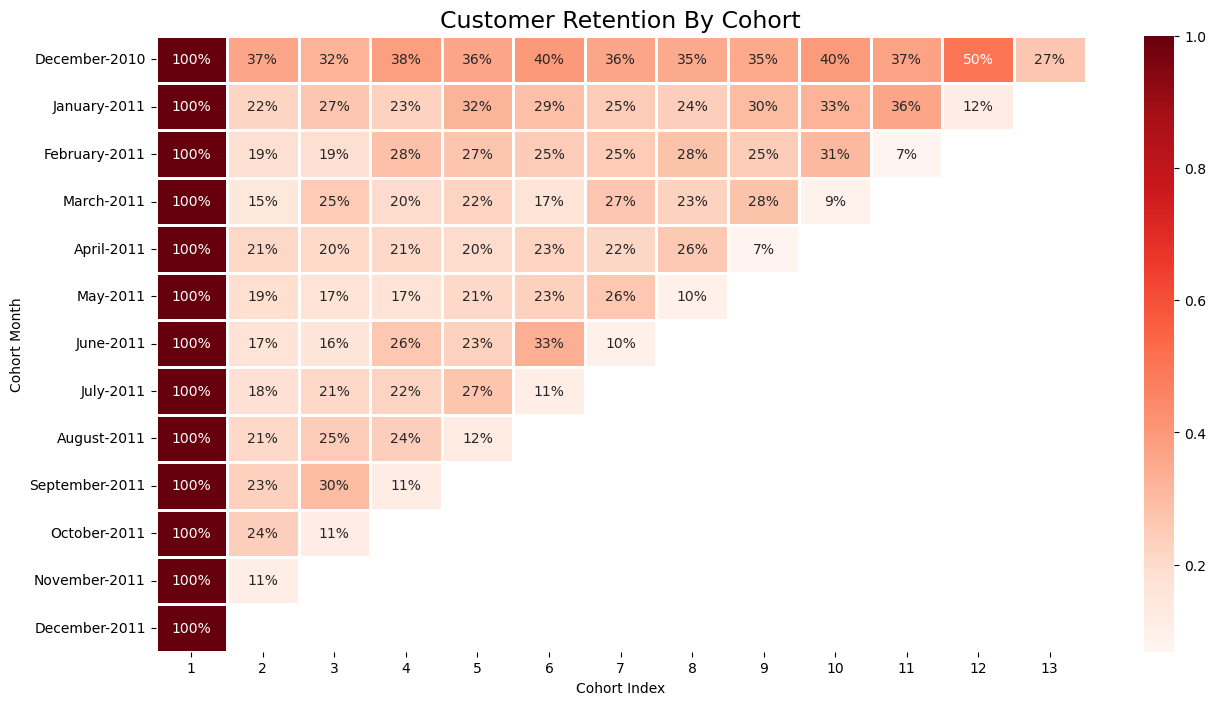

In [32]:
plt.figure(figsize= (15,8))
sns.heatmap(cohort_perc, cmap= 'Reds', cbar = True, annot = True,fmt= '.0%', linewidths=1, linecolor='white')
plt.title('Customer Retention By Cohort', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

### Insights

1. **High Retention in December 2010 Cohort:**
   - The December 2010 cohort have higher customer retention compared to other cohorts. as well as this cohort maintained approximately 50% of its initial customers until November.
   - Leverage the high retention observed in December 2010 cohort by implementing targeted strategies 

2. **Customer Return Behavior in November:**
   - An interesting pattern where customers tend to return and make purchases during November. However, there is a substantial drop in activity immediately after this month.
   - This drop could be due to lack of data after 09/12/2011
   - investigate the factors contributing to the significant drop in customer activity after November
  


###  Revenue by Cohort

In [33]:
cohort_revenue = df[['CohortMonth', 'CohortIndex' ,'Value']].groupby(['CohortMonth','CohortIndex' ])\
.agg({'Value':'sum'}).reset_index()

In [34]:
cohort_revenue = cohort_revenue.pivot(index = 'CohortMonth', columns= 'CohortIndex', values = 'Value')

cohort_revenue

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,572713.890,276237.69,233845.37,303119.39,204407.66,336627.50,314162.61,310783.92,331749.220,472813.64,456080.61,513803.59,185803.13
2011-01,293207.350,55149.91,63268.17,71587.40,81114.09,84583.78,70107.40,72689.71,72023.651,111803.90,123882.10,26464.82,NaN
2011-02,158142.070,29043.24,41134.38,48238.86,40147.91,34223.23,49706.63,62450.83,55380.060,64809.45,10600.22,NaN,NaN
2011-03,200069.960,30059.43,59057.51,42816.61,51657.33,40020.81,64919.49,71023.95,71265.830,12868.02,NaN,NaN,NaN
2011-04,122011.491,29452.82,25077.07,24311.47,26314.19,30206.30,28668.98,34228.61,6350.100,NaN,NaN,NaN,NaN
2011-05,124103.780,18682.76,20193.76,19162.17,27861.87,32976.60,33312.91,179251.53,NaN,NaN,NaN,NaN,NaN
2011-06,135742.950,14805.15,14155.40,30961.59,26754.54,42808.25,8227.35,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,74008.751,11789.67,15534.18,17551.47,19512.11,6072.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79756.100,20962.93,35503.90,44541.76,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


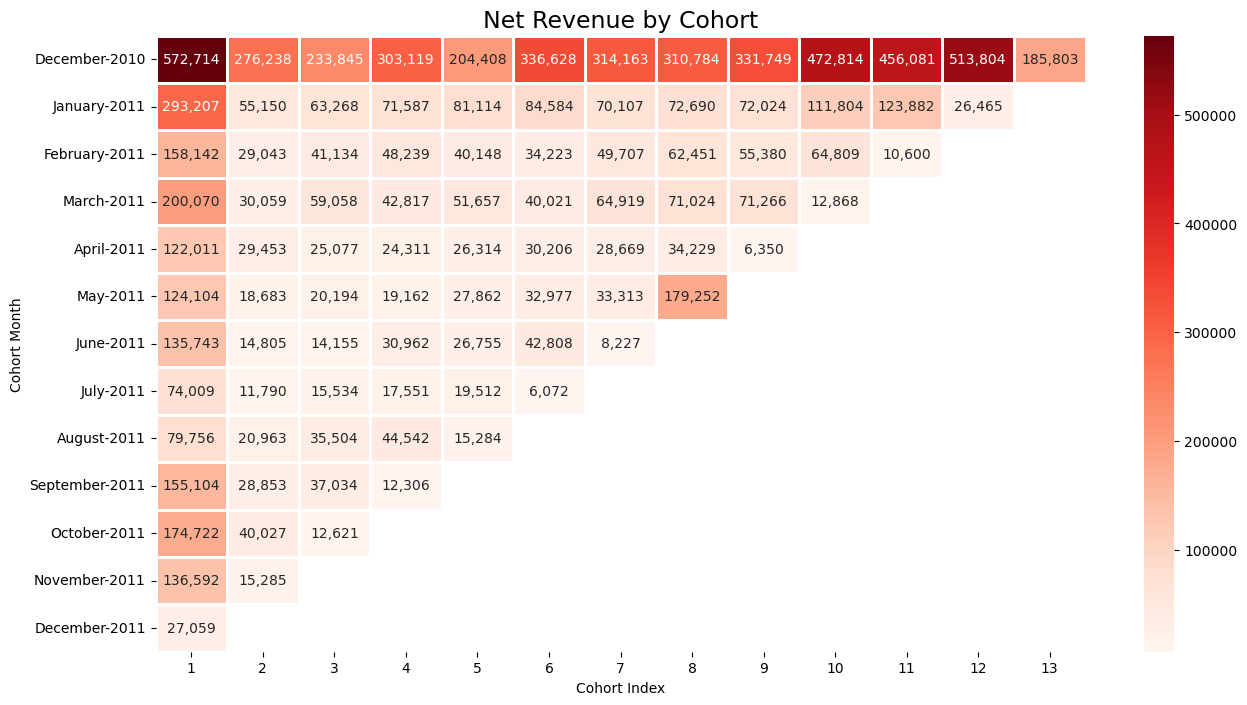

In [35]:
plt.figure(figsize=(15,8))
cohort_revenue.index = pd.to_datetime(cohort_revenue.index).strftime('%B-%Y')
sns.heatmap(cohort_revenue, cmap= 'Reds', annot= True, fmt= '0,.0f', linewidths= 1 , linecolor= 'white')
plt.title('Net Revenue by Cohort', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

In [36]:
# Net revenue retention 
cohort_revenue_ret = cohort_revenue.div(cohort_revenue.iloc[:,0], axis = 0)

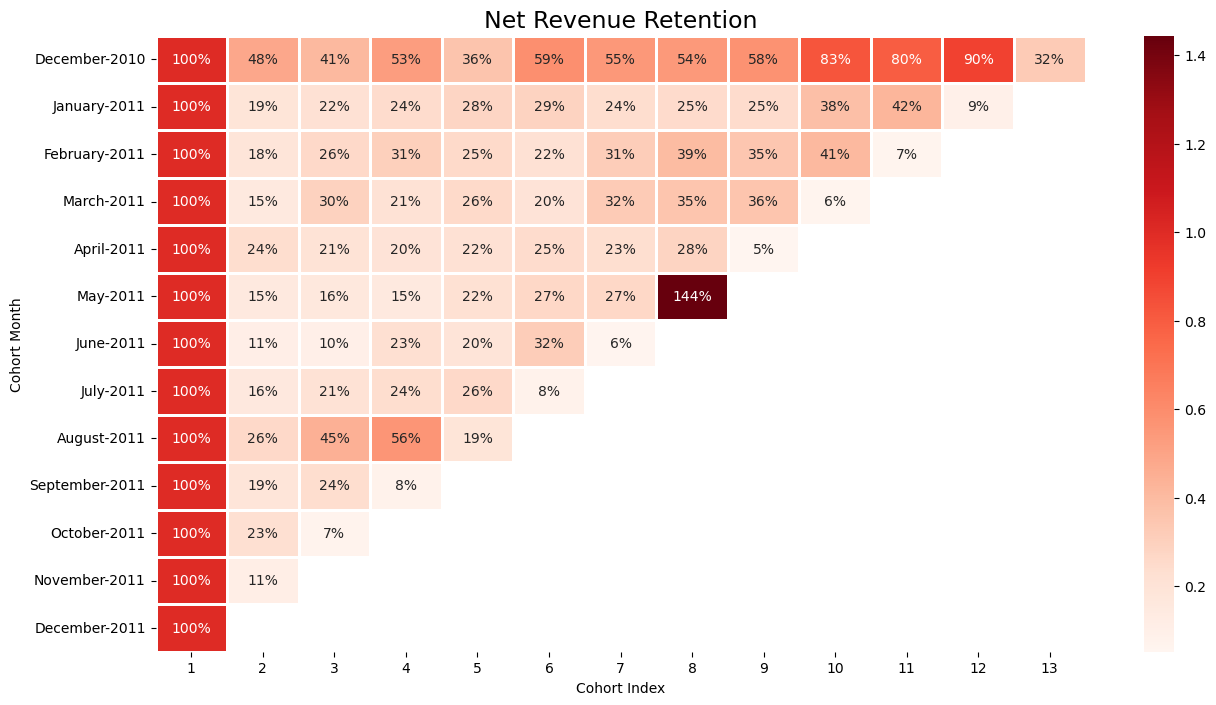

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(cohort_revenue_ret, cmap= 'Reds', annot= True, fmt= '0.0%', linewidths= 1 , linecolor= 'white')
plt.title('Net Revenue Retention', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

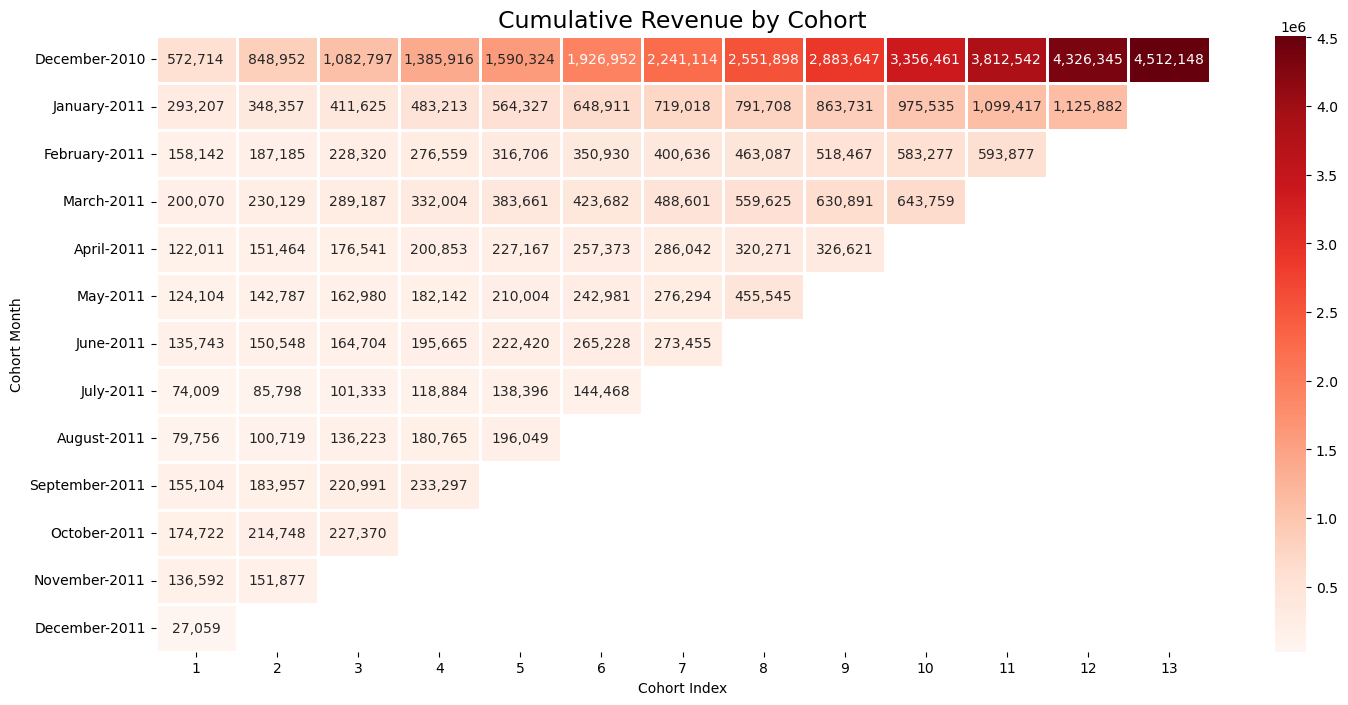

In [38]:
# creating cumulative revenue by cohort
cohort_revenue_cumulative = cohort_revenue.cumsum(axis=1)
plt.figure(figsize=(17,8))
sns.heatmap(cohort_revenue_cumulative, cmap= 'Reds', annot= True,fmt="0,.0f", linewidths= 1 , linecolor= 'white')
plt.title('Cumulative Revenue by Cohort', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

### Insights

- December have exceptional revenue with impressive retention.
- The May cohort recorded revenue growth surpassing 100% during December.
- The August cohort displayed significant retention in both November and October.
- The highest revenue was observed in December 2010, 
- January have highest revenue for the cohorts in the year 2011. 
- Cohorts revenue stable from February to May,however a decline in revenue occurred for cohorts after May suggesting a noteworthy shift.

#### Recommendations

- Implement strategies similar that is been used to those successful in December 2010.
- Examine the behavior of the August cohort to understand the factors contributing to its notable retention.
- Investigate the purchasing behavior of the May cohort to identify motivations leading to exceptional 100%+ revenue retention.
- Given the substantial revenue observed in January, consider targeting cohorts from that period for further study. Investigate the dynamics that led to their success and explore reasons behind the subsequent cumulative revenue drop observed in cohorts after May.

# RFM Analysis and Segmentation

In [39]:
# the most recent date in the data set 
r = df['InvoiceDate'].max()
r.strftime('%Y-%m-%d')

'2011-12-09'

In [40]:
# creating rfm table
rfm = df.groupby('CustomerID').agg({'InvoiceDate':lambda date: (r - date.max()).days,
                              'InvoiceNo': pd.Series.nunique,
                              'Value': 'sum'
                             })
rfm.columns = ['Recency', 'Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


In [41]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,91.518322,100.009747,0.0,17.000,50.00,141.00,373.00
Frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
Monetary,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02


In [42]:
hist, bin_edges = np.histogram(rfm['Monetary'], bins= 50)

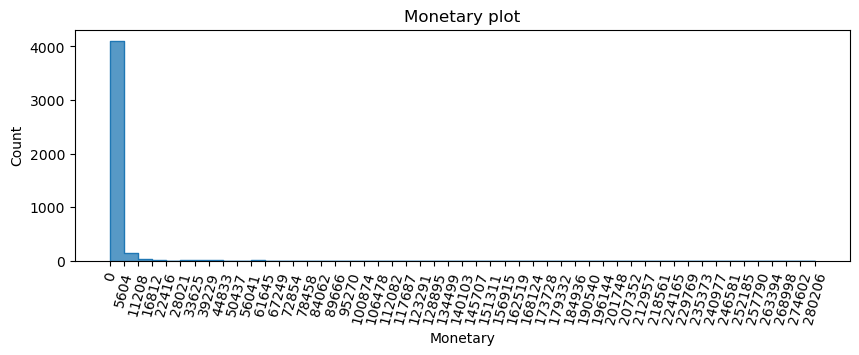

In [43]:
plt.figure(figsize=(10,3))
sns.histplot(x = 'Monetary', data = rfm, bins= 50 , element= 'step')
plt.title('Monetary plot')
plt.xticks(bin_edges, rotation = 75)
plt.show()

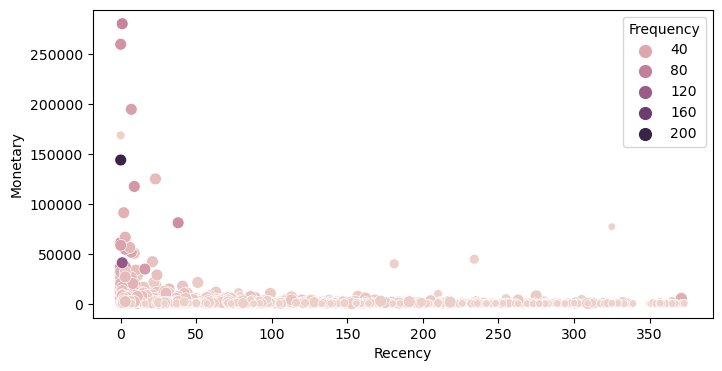

In [44]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = rfm, x = 'Recency', y ='Monetary', size= 'Frequency',size_norm=(0,5), hue= "Frequency")
plt.show()

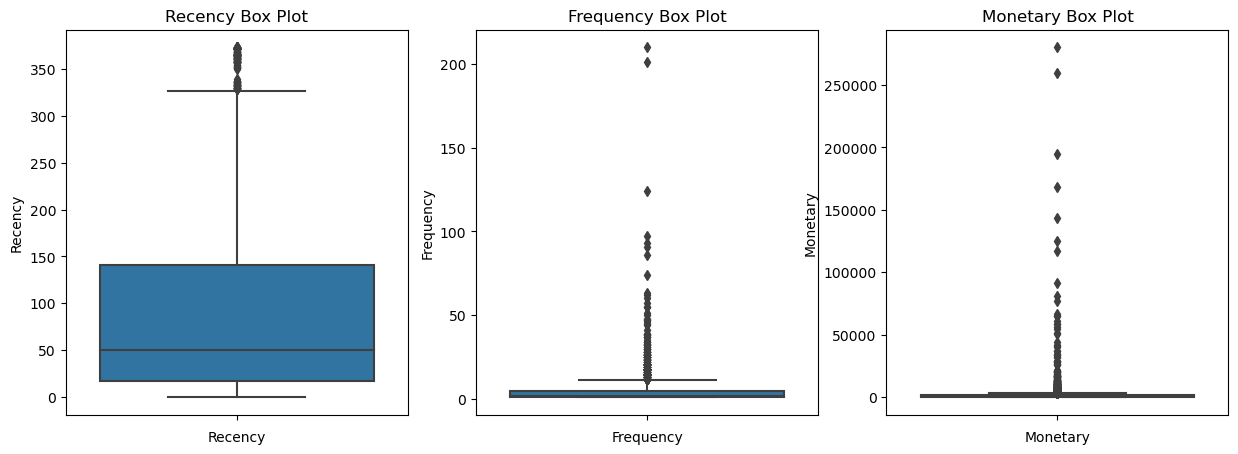

In [45]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
sns.boxplot(data= rfm,y = rfm['Recency'], ax= ax[0])
sns.boxplot(data= rfm,y = rfm['Frequency'], ax= ax[1])
sns.boxplot(data= rfm,y = rfm['Monetary'], ax= ax[2])
ax[0].set_title('Recency Box Plot')
ax[0].set_xlabel('Recency')
ax[1].set_title('Frequency Box Plot')
ax[1].set_xlabel('Frequency')
ax[2].set_title('Monetary Box Plot')
ax[2].set_xlabel('Monetary')
plt.show()

### Insights

The majority of customers fall within the monetary range of (0 to 5,600) and recency of (0 to 50), however on average our customers spend 674$. Given the skewed nature of the monetary data using the median for the monetary variable would be more appropriate. Additionally we observe an average frequency of 91 purchases with a recurrence of 4 days overall favorable values.

In [46]:
# Give scores for Frequency, Recency and Monetary
from scipy.stats import percentileofscore
rfm['RecencyScore'] = rfm['Recency'].apply(lambda x: 10 - percentileofscore(rfm['Recency'], x)/10).round().astype(int)
rfm['FrequencyScore'] = rfm['Frequency'].apply(lambda x: percentileofscore(rfm['Frequency'], x)/10).round().astype(int)
rfm['MonetaryScore'] = rfm['Monetary'].apply(lambda x: percentileofscore(rfm['Monetary'], x)/10).round().astype(int)

In [47]:
# RFM score adding more weight to recency and frequency 
rfm['RFMScore'] = (rfm['FrequencyScore']*0.5+ rfm['RecencyScore']*0.3 +rfm["MonetaryScore"]*0.2).round().astype(int)

#### Segmenting customers Based on RFM
Now we can segment customers according to their RFM scores, with additional emphasis on recency and frequency. These segments are flexible and can be adjusted based on business perspectives and needs.

In [48]:

rfm['RFMSegment'] = np.select(
    [
        (rfm['RFMScore'] >= 8),
        ((6 <= rfm['RFMScore']) & (rfm['RFMScore'] < 8)),
        ((4 <= rfm['RFMScore']) & (rfm['RFMScore'] < 6)),
        ((2 <= rfm['RFMScore']) & (rfm['RFMScore'] < 4)),
        (rfm['RFMScore'] < 2)
    ],
    [
        "Champions", 
        "Loyal Customers", 
        "Potential Loyalists", 
        "New Customers", 
        "Lost Customers"
    ]
)
rfm.sample(10)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,RFMSegment
CustomerID,,,,,,,,
16917,276,1,391.52,1,2,3,2,New Customers
14514,60,3,1055.35,4,6,6,5,Potential Loyalists
12610,22,5,2099.54,7,8,8,8,Champions
15271,6,15,2507.07,9,10,8,9,Champions
17094,321,1,302.00,0,2,2,1,Lost Customers
13527,33,7,2287.51,6,9,8,8,Champions
15755,9,6,2364.25,8,8,8,8,Champions
15438,130,1,156.58,3,2,1,2,New Customers
16718,368,1,623.75,0,2,5,2,New Customers


In [49]:
rfm.groupby('RFMSegment')[['Recency','Frequency','Monetary']].agg(['mean','count']).round(2)

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
RFMSegment                                                      
Champions             13.36   918     11.97   918  6543.55   918
Lost Customers       327.83   172      1.00   172   146.23   172
Loyal Customers       45.23   920      4.07   920  1716.42   920
New Customers        161.65  1283      1.13  1283   397.94  1283
Potential Loyalists   75.94  1046      2.09  1046   754.88  1046

# Machine Learning 
Building a machine learning model based on the RFM features to:  
- Predicting how much the customer will spend in the next 90 days (Regression Model)  
- What will be the probability a customer will make purchase in the next 90 days (Classification Model)
- See how these factors impact the customer decision

Since we are dealing with time element which is making prediction for the 90 days we have to create a time split or temporal split such that we end up having data before 90 days of our most recent date to build a model able to predict 90 days in the ahead 

In [50]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [51]:
# finding the most recent date
max_date = df['InvoiceDate'].max()
max_date.strftime('%Y-%m-%d')

'2011-12-09'

In [52]:
# the cutting date to split the data
cutt = max_date - pd.to_timedelta(90, unit= 'd')
cutt.strftime('%Y-%m-%d')

'2011-09-10'

In [53]:
df_before = df[df['InvoiceDate'] <= cutt]
df_after = df[df['InvoiceDate'] > cutt]

In [54]:
# creating the features to use in the models using the data of the last 90 days 

# evaluate the total amount spen in the last 90 day 
spend_df = df_after.groupby('CustomerID').agg({'Value': sum}).set_axis(['Spend90D'], axis = 1)
# Assigin a value of 1 for each customer who but in the last 90 days
spend_df['Buy90D'] = 1 

In [55]:
spend_df.head()

,Spend90D,Buy90D
CustomerID,,
12347,1519.14,1
12348,310.00,1
12349,1757.55,1
12352,944.23,1
12356,58.35,1


Know we calculate the historical RFM values, then merge both dataframes to prepare the data for machine learning algorithm.

In [276]:
hist_rfm = df_before.groupby('CustomerID').agg({
    'InvoiceDate': lambda x : ( cutt - x.max()).days,
    'InvoiceNo' : pd.Series.nunique,
    'Value' : 'sum'
}).set_axis(["Recency","Frequency","Monetary"], axis = 1)

In [597]:
clv_df = hist_rfm.merge(spend_df, how = 'left', left_index= True, right_index= True ).fillna(0)

clv_df.head(3)

,Recency,Frequency,Monetary,Spend90D,Buy90D
CustomerID,,,,,
12346,235,1,77183.60,0.00,0.0
12347,39,5,2790.86,1519.14,1.0
12348,158,3,1487.24,310.00,1.0


Now that all the features are prepared, it's time to build the two models as outlined earlier:
1. Regression model for forecasting the total expenditure of a customer in the next 90 days.
2. Classification model to estimate the likelihood of a customer making a purchase within the next 90 days.  

## 1) Regression Model
Before constructing the model, let's explore how the customer's spending in the recent 90 days correlates with the RFM factors to see the nature of the relationship between these variables and how in nature these variables affecting the amount spending by the customers.

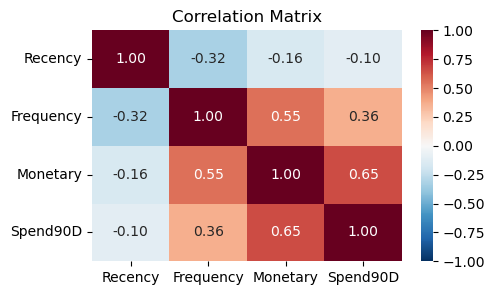

In [598]:
# correlation matrix
corr = clv_df[["Recency","Frequency","Monetary",'Spend90D']].corr()
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot= True , fmt="0.2f", cmap= "RdBu_r", vmin=-1, vmax= 1, cbar= True)
plt.title('Correlation Matrix')
plt.show()

the correlation analysis reveals the following relationships between RFM factors and spending :

- Positive relationships exist between spending and both frequency and monetary factors. More frequent customers, who typically make larger purchases, tend to spend more. The strength of the relationship is moderate with frequency (0.36) and moderate to strong with monetary (0.65).
- Negative relationship with recency, the negative indicating that more recent customers tends to spend more, the strength of the relationship is weak (-0.1), but it give an idea how recency affect the total amount spend by customers.

These variables can be considered good explanatory variables for the target variable but not strong predictor variable,however since this project interested in how RFM affect customer behavior it will be used to predict how much the customer is going to spend in the next 90 days.  

- Also need to mention there is a collinearity between the variables which will also affect the model performance, collinearity can be handle with VIF test but since only 3 variables it will end up with maybe 1 variable, so just to make things clear and to manage the expectations 

Now let's create a data table have the recent data with the recent RFM values that we can use later on making prediction 

In [354]:
max_date = df_after['InvoiceDate'].max()  # from the recent data frame 

recent_rfm = df_after.groupby('CustomerID').agg({
    "InvoiceDate": lambda x : (max_date - x.max()).days,
    "InvoiceNo": pd.Series.nunique,
    "Value" : sum
}).set_axis(["Recency","Frequency",'Monetary'], axis = 1)
recent_rfm.head(3)

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,2,1519.14
12348,75,1,310.00
12349,18,1,1757.55


In [357]:
recent_data = recent_rfm.merge(spend_df, how='inner',left_index= True, right_index= True) # combining data 
recent_data.head(3)

,Recency,Frequency,Monetary,Spend90D,Buy90D
CustomerID,,,,,
12347,2,2,1519.14,1519.14,1
12348,75,1,310.00,310.00,1
12349,18,1,1757.55,1757.55,1


In [609]:
X_test = recent_data[["Recency","Frequency",'Monetary']]
y_test = recent_data['Spend90D']

In [608]:
# setting the variables

# selectting the predictor 
X = clv_df[["Recency","Frequency",'Monetary']]
# target variable
y = clv_df['Spend90D']

I used a 10-fold cross-validation strategy instead of a traditional data split into training and testing sets since its temporal data, such that the data is arranged and sorted in timely manner as temporal data often exhibits patterns or trends that change over time. Traditional random data splitting might not capture these temporal patterns effectively

I will employ various regression models.
- The models I plan to use include:
  1. XGBoost regressor
  2. RandomForest
  3. Multiple linear regression
  4. Regression tree
- After applying these models, I will assess their performance and select the one that yields the most favorable results for the analysis.

## Configure the models

#### XGBoost Regressor Model

In [69]:
# Importing the evaluation metric
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report,roc_auc_score,log_loss

In [650]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
# setting up the xgboost Reg model
xgb_reg_model = XGBRegressor(objective= 'reg:squarederror', random_state = 55)
# Grid search parameter for tunning
param = {'learning_rate' : [0.01,0.1,0.3,0.5], 
         'max_depth':[2,4,5,6,7],
       }

# Grid search object
xgb_grid_search = GridSearchCV(estimator= xgb_reg_model, param_grid= param, cv= 10, 
                               scoring= 'neg_mean_absolute_error', refit= True)

#### Random Forest Model

In [651]:
# setting up Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_reg_model = RandomForestRegressor(random_state= 33)
param = {
    'n_estimators': [5,10,15,20,25,50],
    'max_depth': [2,3,4,5,6,7]
}  
rf_grid_search = GridSearchCV(estimator= rf_reg_model, param_grid= param, cv = 10, 
                              refit= True,scoring= 'neg_mean_squared_error')

#### Multiple Linear Regression

In [383]:
# setting up the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr_parm = {'fit_intercept': [True, False]}

mlr_grid = GridSearchCV(estimator=mlr, param_grid= mlr_parm, cv=10, 
                        scoring='r2', refit=True)

#### Polynomial Regression

In [469]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge # used to prevent the overfit due to the higher order of the parameter using polynomial
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(), Ridge() )

p_param = {
    'polynomialfeatures__degree':[2,3,4,5,6,7,8,9,10,11,12,13],
       'ridge__alpha': [0.1, 1, 10] }

poly_grid_search = GridSearchCV(estimator= poly_reg, param_grid= p_param, cv= 10, scoring= 'r2')

#### Decision Tree Regressor

In [652]:
# setting up the model
from sklearn.tree import DecisionTreeRegressor
dt_reg_model = DecisionTreeRegressor(criterion= "squared_error", random_state=100)
dt_n = {'max_depth':[2,3,4,5]}

dt_reg_model_grid = GridSearchCV(estimator= dt_reg_model, param_grid= dt_n, cv = 10, 
                                  scoring= 'neg_mean_squared_error', refit= True)

## Models training and evaluation

#### XGB Model

In [671]:
xgb_grid_search.fit(X, y)   # Train the model

y_hat = xgb_grid_search.predict(X)  # using training data 

# Evaluate the model on the training data 
print("R-squared: ",r2_score(y,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y,y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y,y_hat)))

R-squared:  0.979022806279003 
Mean Absolute Error:  404.98611677055015 
Root Mean Squared Error:  725.1238127419299


In [672]:
# Using the recent data to make prediction and evaluate the model

y_hat = xgb_grid_search.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test,y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_hat)))

R-squared:  0.8167864399581477 
Mean Absolute Error:  596.5863585483855 
Root Mean Squared Error:  2306.441764444812


In [673]:
xgb_grid_search.best_score_

-689.8289938403574

In [674]:
xgb_grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5}

#### RandomForest Model

In [675]:
rf_grid_search.fit(X, y)  # train the model

# using the trained data
y_hat = rf_grid_search.predict(X)

print("R-squared: ",r2_score(y,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y,y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y,y_hat)))


R-squared:  0.7980059519466074 
Mean Absolute Error:  560.83272509045 
Root Mean Squared Error:  2250.130773946297


In [676]:
# predict and evaluate based on recent data
y_hat = rf_grid_search.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test, y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_hat)))

R-squared:  0.5574244143016522 
Mean Absolute Error:  710.1538066798579 
Root Mean Squared Error:  3584.7379464150513


In [677]:
rf_grid_search.best_score_

-20781867.48947832

In [678]:
rf_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 15}

#### Multiple Linear Regression Model

In [679]:
# train the model
mlr_grid.fit(X, y)

# evaluate using traiend data
y_hat = mlr_grid.predict(X)

print("R-squared: ",r2_score(y,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y,y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y,y_hat)))

R-squared:  0.42419119857610055 
Mean Absolute Error:  644.63317617381 
Root Mean Squared Error:  3799.072857702508


In [680]:
# predict and evaluate based on recent data
y_hat = mlr_grid.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test, y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_hat)))

R-squared:  0.7672781636052903 
Mean Absolute Error:  560.4565618780138 
Root Mean Squared Error:  2599.4547051086074


In [681]:
mlr_grid.best_score_

0.22876316392153612

In [682]:
mlr_grid.best_params_

{'fit_intercept': False}

#### Regression Tree Model

In [683]:
dt_reg_model_grid.fit(X, y)

# training  data
y_hat = dt_reg_model_grid.predict(X)

print("R-squared: ",r2_score(y,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y,y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y,y_hat)))

R-squared:  0.8935660990296908 
Mean Absolute Error:  582.7758515871706 
Root Mean Squared Error:  1633.3470142577655


In [684]:
# recent data
y_hat = dt_reg_model_grid.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test, y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_hat)))

R-squared:  0.3101971753385392 
Mean Absolute Error:  764.7288535513883 
Root Mean Squared Error:  4475.341400105458


In [685]:
dt_reg_model_grid.best_score_

-32744609.10158525

In [686]:
dt_reg_model_grid.best_params_

{'max_depth': 4}

### Evaluation

* XGBoost Regressor model outperforms others in predicting customer spending especially for the unseen data (the recent data), achieving the highest R-squared value of 0.81 This implies the model can explain for 81% of the spending variation,  making it a reliable estimator.  
* On average, predictions deviate by $569 for the 90-day spending period.

#### Feature importances

In [687]:
best_reg_model = xgb_grid_search.best_estimator_

In [689]:
factor_tbl = {
    'factor':["Recency","Frequency",'Monetary'],
    'feature_importances':best_reg_model.feature_importances_.tolist()
}
factor_tbl = pd.DataFrame(factor_tbl)
factor_tbl.sort_values('feature_importances', ascending= False, inplace= True, ignore_index=True)

factor_tbl

,factor,feature_importances
0,Monetary,0.597549
1,Recency,0.345087
2,Frequency,0.057364


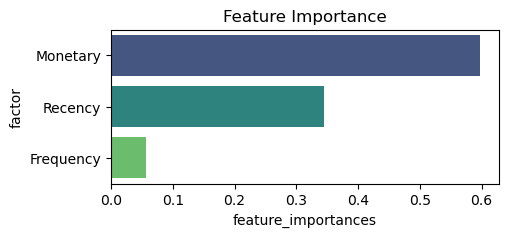

In [690]:
plt.figure(figsize=(5,2))
sns.barplot(x='feature_importances', y = 'factor', data = factor_tbl, palette= 'viridis')
plt.title('Feature Importance')
plt.show()

The primary factor influencing customer spending is monetary value. A higher monetary value indicates a likelihood of higher spending. Recency also plays a critical role, Frequency has the least impact on the total amount spent.
So in order to make customer spend more we should offer for them more products 

## 2) Classification Model
As my focus is on predicting the probability of a customer making a purchase in the next 90 days, I'll use the following models:
- XGBoost classifier
- Logistic regression

In [694]:
# Classification model variables
y = clv_df["Buy90D"] # only change the target variable

Before devising any machine learning algorithm, let's first explore the simplest model: predicting the likelihood of a customer making a purchase in the next 90 days.

In [695]:
clv_df[clv_df['Buy90D'] == 1].shape[0]/clv_df.shape[0]

0.5700296735905045

approximately 57%, the estimated probability of a customer making a purchase in the next 90 days.

## Configure the models

#### XGBoost Classification Model

In [696]:
# XGBoost Classification Model setting
xgb_clas_model = XGBClassifier(objective= 'binary:logistic', random_state = 45)
clas_param = {
    'learning_rate': [0.01,0.1,0.3,0.5],
    'n_estimators' : [10,50,100]
    
}
xgb_class_grid_search = GridSearchCV(estimator= xgb_clas_model, param_grid= clas_param, cv = 10, scoring= 'roc_auc')

#### Logistic Regression

In [697]:
# Logistic Regression model configure
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_param = {
    'C': [0.001, 0.01, 0.1, 1, 10,],
    'solver' : ['lbfgs','liblinear','newton-cholesky']
}
log_grid_search = GridSearchCV(estimator= log_reg, param_grid= log_param, cv= 10, scoring= 'roc_auc')

## Models training and evaluation

#### XGBoost Classification Model

In [698]:
xgb_class_grid_search.fit(X,y)

y_hat = xgb_class_grid_search.predict(X)

y_pred = xgb_class_grid_search.predict_proba(X)

print('AUC Score:',roc_auc_score(y,y_hat),\
      "\nProb Loss: ",log_loss(y, y_pred),
     "\nReport: \n",classification_report(y, y_hat))

AUC Score: 0.7117802616750176 
Prob Loss:  0.5675004941753288 
Report: 
               precision    recall  f1-score   support

         0.0       0.69      0.64      0.66      1449
         1.0       0.74      0.79      0.76      1921

    accuracy                           0.72      3370
   macro avg       0.72      0.71      0.71      3370
weighted avg       0.72      0.72      0.72      3370



In [699]:
xgb_class_grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

#### Logistic Regression Model

In [700]:
log_grid_search.fit(X,y)

y_hat = log_grid_search.predict(X)

y_pred = log_grid_search.predict_proba(X)

print('AUC Score:',roc_auc_score(y,y_hat),\
      "\nProb Loss: ",log_loss(y, y_pred),
     "\nReport: \n",classification_report(y, y_hat))

AUC Score: 0.6676528248852446 
Prob Loss:  0.5890530096640222 
Report: 
               precision    recall  f1-score   support

         0.0       0.62      0.63      0.62      1449
         1.0       0.72      0.71      0.71      1921

    accuracy                           0.67      3370
   macro avg       0.67      0.67      0.67      3370
weighted avg       0.67      0.67      0.67      3370



### Evaluation
- Both models have comparable area under the curve (AUC) values and loss probability and perform well.
- Both model can classify weather the customer is going t buy or not
-  XGBoost Model Regression have higher average accuracy of 72% making it the best model 

#### Feature importances

In [702]:
best_class_model = xgb_class_grid_search.best_estimator_

In [703]:
class_factor_tbl = {
    'factor':["Recency","Frequency",'Monetary'],
    'feature_importances':best_class_model.feature_importances_.tolist()
}
class_factor_tbl = pd.DataFrame(class_factor_tbl)
class_factor_tbl.sort_values('feature_importances', ascending= False, inplace= True, ignore_index=True)
class_factor_tbl

,factor,feature_importances
0,Frequency,0.838366
1,Recency,0.087332
2,Monetary,0.074303


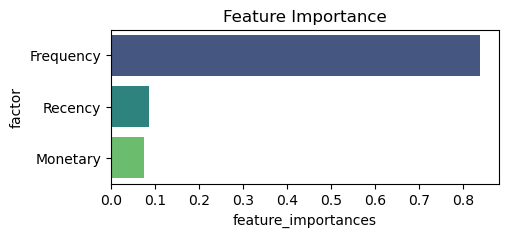

In [705]:
plt.figure(figsize=(5,2))
sns.barplot(x='feature_importances', y = 'factor', data = class_factor_tbl, palette= 'viridis')
plt.title('Feature Importance')
plt.show()

* The primary factor influencing customers' decision to make a purchase is frequency, which has the greatest impact.
* Recency and Monetary have small and similar impact.  

So in order to make customer make purchase or keep the customer we should focus on making the customer make more frequent purchase

## Using the models for business decisions

In [706]:
clv_df['SpendPred'] = best_reg_model.predict(X)  # x is the same for both model
clv_df['BuyProb'] = best_class_model.predict_proba(X)[:,1]

In [707]:
clv_df.sample(10)

,Recency,Frequency,Monetary,Spend90D,Buy90D,SpendPred,BuyProb
CustomerID,,,,,,,
17446,86,2,120.90,0.00,0.0,108.554253,0.369902
16497,113,5,1550.70,1414.99,1.0,752.899841,0.729989
14446,156,1,303.04,736.54,1.0,239.643387,0.455529
17080,179,1,76.32,211.30,1.0,79.047249,0.407429
15092,125,2,457.81,0.00,0.0,239.066925,0.461274
12930,81,1,221.56,194.24,1.0,252.902939,0.683324
14520,200,1,165.00,105.60,1.0,105.516518,0.472539
13320,16,3,981.15,567.55,1.0,519.472900,0.659334
14081,212,2,934.52,0.00,0.0,338.665558,0.476357


In [708]:
customer_data = clv_df.copy().reset_index()

## answers the model can provide 

1. Missed opportunities customers were supposed to spend money in last 90 days but didn't spend any money 
      - Reach these customer and encourage them to buy

In [709]:
customer_data[customer_data['Spend90D'] == 0].sort_values('SpendPred',ascending = False, ignore_index= True)\
[["Recency","Frequency","Monetary","CustomerID","Spend90D","SpendPred"]][:5]

,Recency,Frequency,Monetary,CustomerID,Spend90D,SpendPred
0,10,8,10254.18,16180,0.0,3542.158936
1,4,2,243.36,17339,0.0,2444.653076
2,23,6,6912.00,13027,0.0,2299.475098
3,92,3,39916.50,15098,0.0,2087.174561
4,67,9,7374.90,12980,0.0,1972.894409


2. Customers having highest buying probability for the next 90 days
    - Target them with new products or similar product of their interest

In [710]:
customer_data[["CustomerID","SpendPred","BuyProb"]].sort_values('BuyProb', ascending = False, ignore_index= True)[:5]

,CustomerID,SpendPred,BuyProb
0,15570,1207.531494,0.82603
1,14667,3365.553955,0.82603
2,13408,8873.061523,0.82603
3,16818,894.432190,0.82603
4,16678,973.736267,0.82603


3. Customers supposed to making purchase but they didn't 
    - Contacting these customers promote offers 

In [712]:
customer_data[(customer_data['Buy90D'] == 0) &(customer_data['BuyProb'] > 0.5) ]\
.sort_values('BuyProb', ascending = False, ignore_index= True)[:5]

,CustomerID,Recency,Frequency,Monetary,Spend90D,Buy90D,SpendPred,BuyProb
0,14414,1,7,1496.98,0.0,0.0,243.245514,0.82603
1,16180,10,8,10254.18,0.0,0.0,3542.158936,0.82603
2,13631,9,11,3070.42,0.0,0.0,1280.150024,0.82603
3,15581,30,13,3679.97,0.0,0.0,1416.965210,0.82603
4,14472,13,8,1936.84,0.0,0.0,923.163147,0.82603


4. Customers recently make a purchase but unlikely to buy again
    - Provide discounts, target them with ads
    - Find what action can be taken to encourage  them to buy them to buy

In [715]:
customer_data[(customer_data['Recency'] < 90) &(customer_data['BuyProb']< 0.5)]\
.sort_values('BuyProb', ascending = False, ignore_index= True)[:5]

,CustomerID,Recency,Frequency,Monetary,Spend90D,Buy90D,SpendPred,BuyProb
0,17984,55,1,152.68,0.00,0.0,116.654686,0.498289
1,13991,53,1,126.35,729.62,1.0,116.654686,0.498289
2,12589,54,1,131.50,515.18,1.0,116.654686,0.498289
3,13669,59,1,48.15,170.40,1.0,97.171188,0.495401
4,13058,61,1,47.55,223.85,1.0,97.171188,0.495401


These data generated by the models can be saved and used 

saving the work

In [717]:
# rfm.to_csv("rfm_data.csv", index= True)
#clv_df[["Spend90D","Buy90D","SpendPred","BuyProb"]].to_csv("clv_data.csv", index= True)
# df.to_csv("trans_data.csv", index= False)
# cohort_revenue.to_csv('cohort_revenue.csv', index = True)
# cohort_pivot.to_csv("cohort_month.csv", index = True)
# customer_data.to_csv('customer_data.csv', index= False)